In [3]:
import glob2 as glob
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import numpy as np

from keras import models, layers
from ngdlm import models as ngdlmodels
from ngdlm import utils as ngdlutils
from keras import models, layers

# Import NGDLM models.
!pip install git+https://github.com/AI-Guru/ngdlm.git
from ngdlm import models as ngdlmodels

  Cloning https://github.com/AI-Guru/ngdlm.git to /tmp/pip-req-build-ax_nfbdu
  Running setup.py bdist_wheel for ngdlm ... done
  Stored in directory: /tmp/pip-ephem-wheel-cache-qaytai4_/wheels/93/06/27/e156acb49f475c364c3c9fa4ad4ab7bfa38808bff5bf9c4647
Successfully built ngdlm


In [11]:
input_img = layers.Input(shape=(128, 128, 1))
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input_img)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
encoded = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Flatten()

x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(
    optimizer = "adadelta",
    loss = "binary_crossentropy"
)
autoencoder.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 128, 128, 1)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 128, 128, 32)      2080      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 32)        65568     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 64, 64, 32)        0         
__________

In [5]:
# Train- and validation-data.
from PIL import Image
import glob2 as glob
from aux_functions import helpers

image_list = []
for filename in glob.glob('../data/a/*.png'): #assuming gif
    im=np.array(Image.open(filename))
    im=helpers.rgb2gray(im)
    image_list.append(im)

In [7]:
x_input_train = np.array(image_list)
#(x_train, _), (x_test, _)= mnist.load_data()

x_input_train = x_input_train.astype('float32')/255.0
#x_input_validate = x_test.astype('float32')/255.0 

x_input_train = x_input_train.reshape((-1, 128, 128, 1))
x_input_train.shape

(369, 128, 128, 1)

In [8]:
# Train.
print("Train...")
history = autoencoder.fit(
        x_input_train, x_input_train,
        epochs=10,
        batch_size=1,
        shuffle=True
        #validation_data=(x_input_validate, x_input_validate)
    )

# Evaluate.
#print("Evaluate...")
#loss = autoencoder.evaluate(x_input_test, x_input_test)
#print("Loss:", loss)

Train...
Epoch 1/10
369/369 [==============================] - 12s 33ms/step - loss: 0.0543
Epoch 2/10
369/369 [==============================] - 13s 35ms/step - loss: 0.0204
Epoch 3/10
369/369 [==============================] - 15s 41ms/step - loss: 0.0176
Epoch 4/10
369/369 [==============================] - 17s 45ms/step - loss: 0.0162
Epoch 5/10
369/369 [==============================] - 71s 191ms/step - loss: 0.0158
Epoch 6/10
369/369 [==============================] - 46s 126ms/step - loss: 0.0152
Epoch 7/10
369/369 [==============================] - 13s 34ms/step - loss: 0.0150
Epoch 8/10
369/369 [==============================] - 13s 35ms/step - loss: 0.0148
Epoch 9/10
369/369 [==============================] - 13s 35ms/step - loss: 0.0146
Epoch 10/10
369/369 [==============================] - 13s 35ms/step - loss: 0.0144


In [9]:
decoded_imgs = autoencoder.predict(x_input_train) 

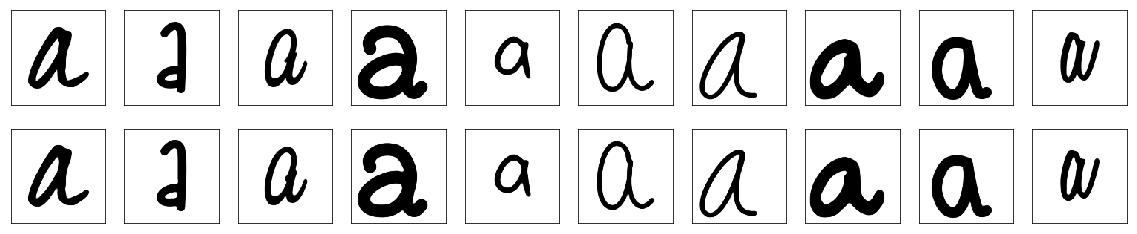

In [10]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_input_train[i].reshape((128,128)), cmap = "gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape((128, 128)), cmap = "gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
plt.close()